<a href="https://colab.research.google.com/github/sivanipatnaik9/codsoft/blob/Task-3/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit card fraud detection

1. Data Collection

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [ ]:
cd = pd.read_csv("/content/creditcard.csv")
cd.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
cd.shape

(284807, 31)

In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

2. Data Processing

In [ ]:
cd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
cd.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


3. EDA(Exploratory Data Analysis)

In [ ]:
cd.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Unique value in class columns
cd.Class.unique()

array([0, 1])


Class Columns has two values i.e 0 & 1 where 1 is Fraud Case and 0 is Valid case.et

In [ ]:

### determine no. of fraud cases
fraud_case = cd[cd['Class'] == 1]
valid_case = cd[cd['Class'] == 0]

print(f"Number of Fraud Case: {len(fraud_case)}")
print(f"Number of Valid Case: {len(valid_case)}")

## In precentage
per = len(fraud_case) / len(cd['Class']) * 100
per

Number of Fraud Case: 492
Number of Valid Case: 284315


0.1727485630620034

Class distribution

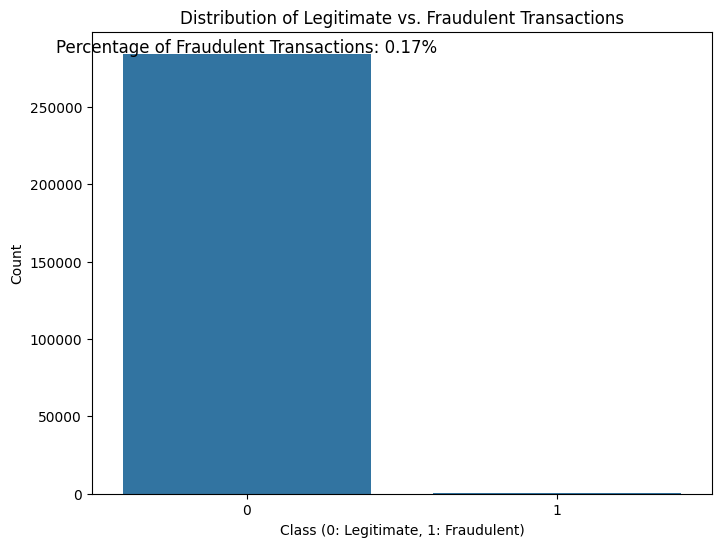

In [ ]:
# Count the number of occurrences for each class (0 for legitimate, 1 for fraudulent)
class_counts = cd['Class'].value_counts()

# Calculate the percentage of fraudulent transactions
percentage_fraudulent = (class_counts[1] / class_counts.sum()) * 100

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=cd)
plt.title('Distribution of Legitimate vs. Fraudulent Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')

# Display the percentage of fraudulent transactions on the plot
plt.text(0, class_counts[0] + 1000, f'Percentage of Fraudulent Transactions: {percentage_fraudulent:.2f}%', fontsize=12, ha='center')

plt.show()

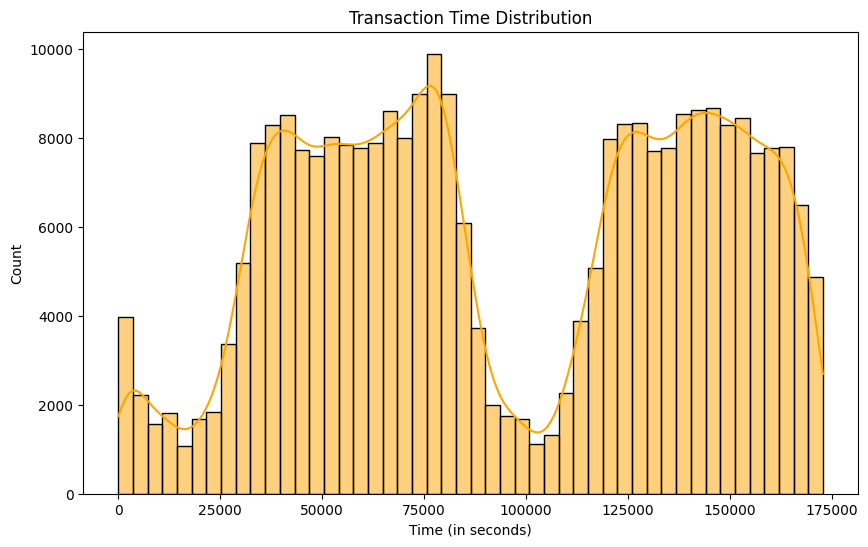

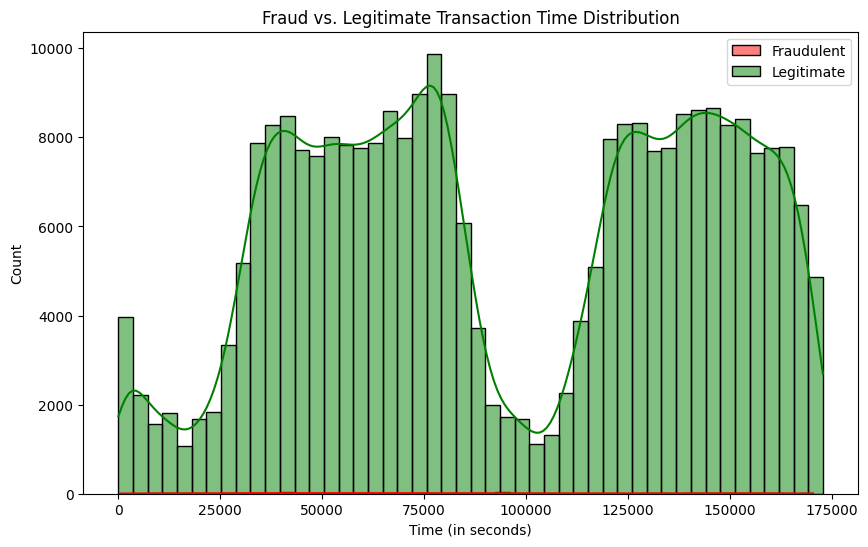

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(cd['Time'], bins=48, kde=True, color='orange')  # Using 48 bins for a daily view
plt.title('Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')

# Check if there are specific times of day when fraud is more likely to occur
plt.figure(figsize=(10, 6))
sns.histplot(cd[cd['Class'] == 1]['Time'], bins=48, kde=True, color='red', label='Fraudulent')
sns.histplot(cd[cd['Class'] == 0]['Time'], bins=48, kde=True, color='green', label='Legitimate')
plt.title('Fraud vs. Legitimate Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')
plt.legend()

plt.show()

Transaction Amount Analysis

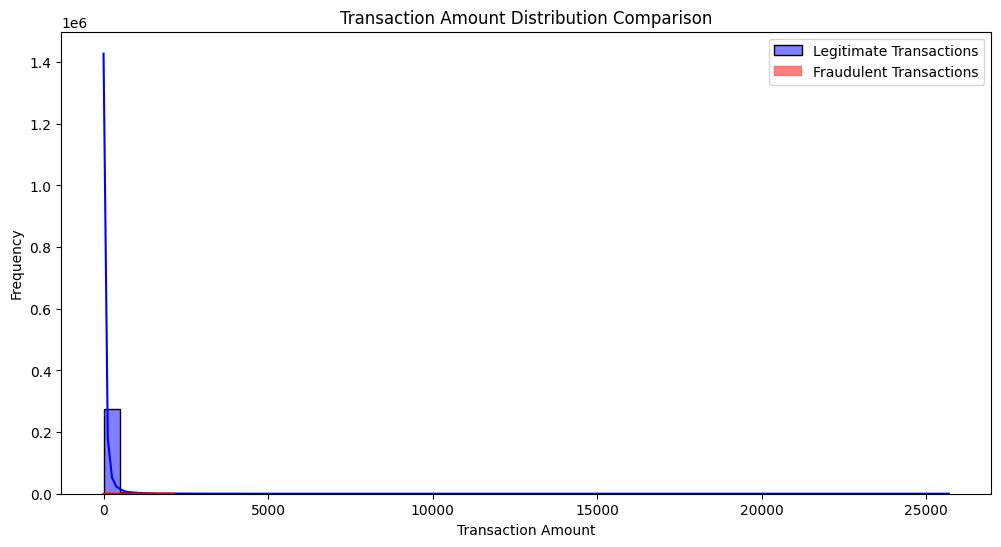

In [ ]:
# Separate data for legitimate and fraudulent transactions
legitimate_transactions = cd[cd['Class'] == 0]['Amount']
fraudulent_transactions = cd[cd['Class'] == 1]['Amount']

plt.figure(figsize=(12, 6))
sns.histplot(legitimate_transactions, color='blue', kde=True, label='Legitimate Transactions', bins=50)
sns.histplot(fraudulent_transactions, color='red', kde=True, label='Fraudulent Transactions', bins=50)

plt.title('Transaction Amount Distribution Comparison')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [ ]:
# Calculate summary statistics for both groups
legitimate_summary = legitimate_transactions.describe()
fraudulent_summary = fraudulent_transactions.describe()

print("Summary Statistics for Legitimate Transactions:")
print(legitimate_summary)
print("\nSummary Statistics for Fraudulent Transactions:")
print(fraudulent_summary)

Summary Statistics for Legitimate Transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Summary Statistics for Fraudulent Transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Feature Correlation

In [ ]:
# Calculate the correlation matrix
correlation_matrix = cd.corr()
print(correlation_matrix)

# Filter the correlations of features with the target variable ('Class')
feature_correlations = correlation_matrix['Class'].drop('Class')
print(feature_correlations)

correlation_threshold = 0.1

highly_correlated_features = feature_correlations[abs(feature_correlations) > correlation_threshold]

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.12

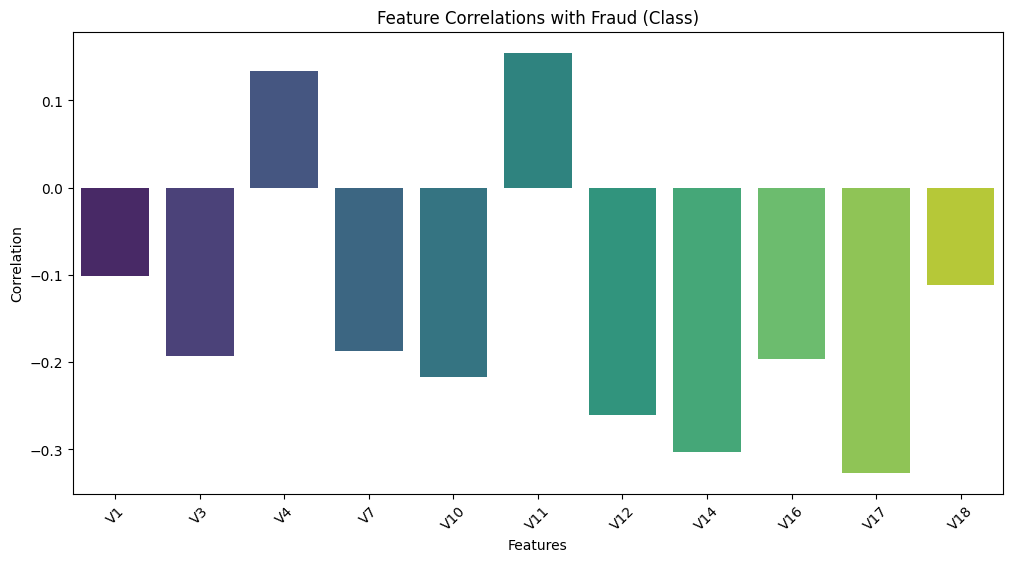

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=highly_correlated_features.index, y=highly_correlated_features.values, palette='viridis')
plt.title('Feature Correlations with Fraud (Class)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)

plt.show()

Transaction Amount vs. Time:
Plot a scatter plot to examine the relationship between transaction amount and time.

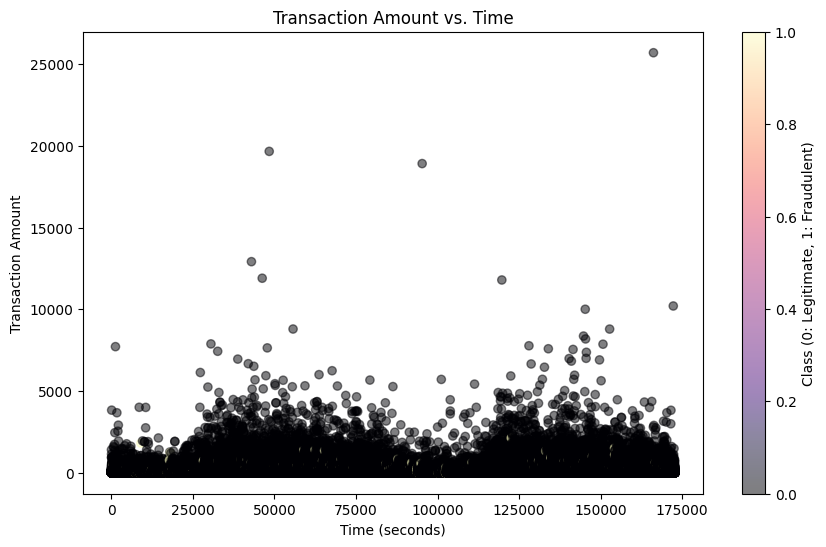

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(cd['Time'], cd['Amount'], c=cd['Class'], cmap='magma', alpha=0.5)
plt.title('Transaction Amount vs. Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.colorbar(label='Class (0: Legitimate, 1: Fraudulent)')

plt.show()

Visualize Heatmap for correlation matrix between features.

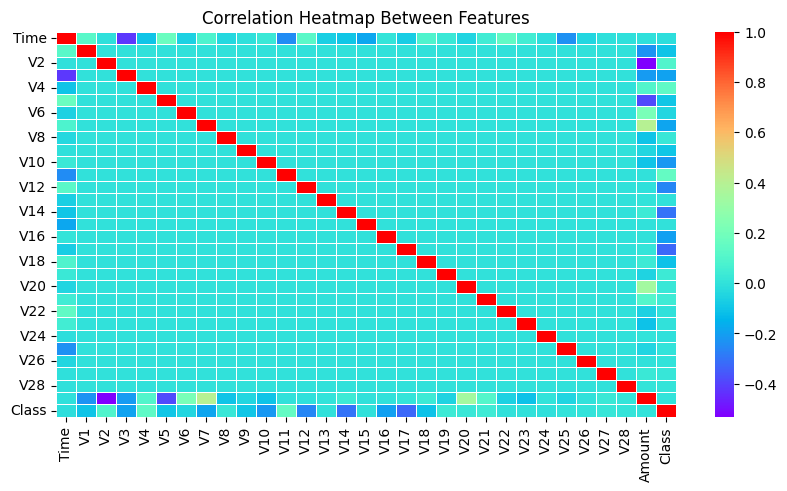

In [ ]:
correlation_matrix = cd.corr()

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, cmap='rainbow', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Between Features')
plt.show()


4. Developing Model

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)

In [ ]:
# Define X and Y

# Test value
X = cd.drop(['Class'], axis=1)
# Target value
Y = cd['Class']

print(f"value and shapes : {X.values,X.shape}")
print(f"value and shapes : {Y.values,Y.shape}")

value and shapes : (array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]]), (284807, 30))
value and shapes : (array([0, 0, 0, ..., 0, 0, 0]), (284807,))


In [ ]:
# Spliting the data for training and Testing

X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

Building Model
Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)
print(Y_test)

[1 0 0 ... 0 0 0]
43428     1
49906     0
29474     0
276481    0
278846    0
         ..
75723     0
252263    0
221246    0
81910     0
59490     0
Name: Class, Length: 56962, dtype: int64


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(Y_test, y_pred))

Confusion Matrix:
 [[56862     2]
 [   23    75]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.9995611109160493
